In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the data
data = pd.read_csv('D:\Churn_Modelling.csv')
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.')

The data has 10000 rows and 14 columns.


In [3]:
# data split ot dependent and independent cols
x = data.iloc[:, 3:-1]
y = data.iloc[:, 13]

In [9]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
# One hot encoding
x = pd.get_dummies(x, drop_first=True, dtype='int')
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [5]:
# libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# train-test splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# Scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
# Build ANN Architecture

    # 1. initiate model as sequential
    # 2. add layers (input, hidden, output) along with activation function, weight initializer
    # 3. optimizer, metrics, loss

In [14]:
# Import required libraries for ANN
import tensorflow as tf               # not mandatory if tf version is > 2.0
import keras
from keras.models import Sequential
from keras.layers import Dense

In [16]:
# Building ANN Architecture

# --- FEED FORWARD MECHANISM --- # (Forward Propagation)
# initialise the model
model = Sequential()
# Building the layers
# input layer
model.add(Dense(units=11, kernel_initializer='he_uniform', input_dim=11))
# first hidden layer
model.add(Dense(units=8, activation='relu', kernel_initializer='he_uniform'))
# second hidden layer
model.add(Dense(units=6, activation='relu', kernel_initializer='he_uniform'))
# output layer
model.add(Dense(units=1, activation='sigmoid'))
# --- BACKWARD PROPOAGATION --- #
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Fitting the data insidde the model architecture
model_history = model.fit(x_train, y_train, validation_split=0.3, batch_size=10, epochs=100)

Epoch 1/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6795 - loss: 0.6212 - val_accuracy: 0.7887 - val_loss: 0.4825
Epoch 2/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7847 - loss: 0.4683 - val_accuracy: 0.7887 - val_loss: 0.4659
Epoch 3/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7972 - loss: 0.4484 - val_accuracy: 0.7887 - val_loss: 0.4574
Epoch 4/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7980 - loss: 0.4333 - val_accuracy: 0.7883 - val_loss: 0.4519
Epoch 5/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7939 - loss: 0.4212 - val_accuracy: 0.7933 - val_loss: 0.4447
Epoch 6/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8086 - loss: 0.4108 - val_accuracy: 0.8025 - val_loss: 0.4382
Epoch 7/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8120 - loss: 0.4161 - val_accuracy: 0.8100 - val_loss: 0.4321
Epoch 8/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8289 - loss: 0.3939 - val_accu

560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8636 - loss: 0.3222 - val_accuracy: 0.8550 - val_loss: 0.3580
Epoch 52/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8665 - loss: 0.3217 - val_accuracy: 0.8529 - val_loss: 0.3581
Epoch 53/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8633 - loss: 0.3311 - val_accuracy: 0.8537 - val_loss: 0.3607
Epoch 54/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8618 - loss: 0.3275 - val_accuracy: 0.8533 - val_loss: 0.3593
Epoch 55/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8629 - loss: 0.3343 - val_accuracy: 0.8546 - val_loss: 0.3612
Epoch 56/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8622 - loss: 0.3264 - val_accuracy: 0.8496 - val_loss: 0.3629
Epoch 57/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8710 - loss: 0.3192 - val_accuracy: 0.8537 - val_loss: 0.3624
Epoch 58/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8631 - loss: 0.3306 - val_accuracy:

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


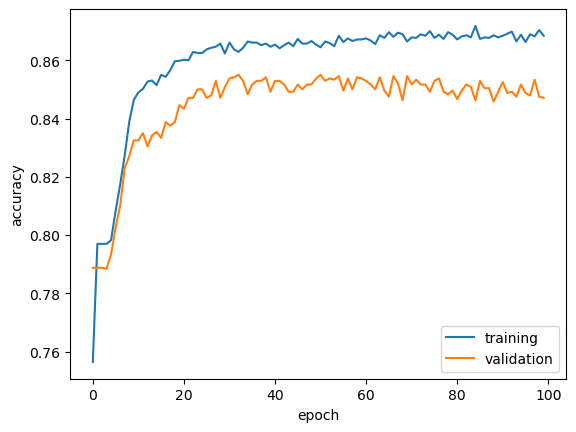

In [19]:
# plot the accuracy vs val_accuracy
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.show()

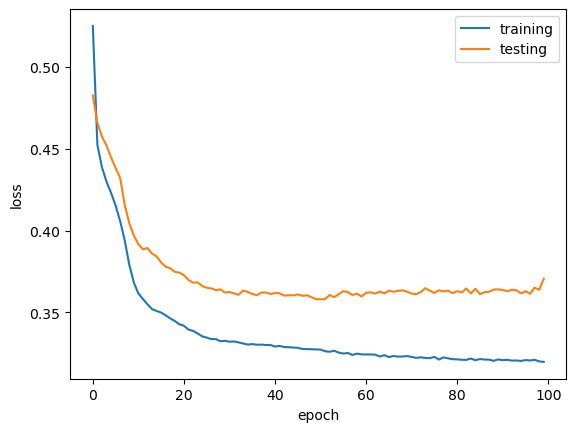

In [20]:
# plot the loss vs val_loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'testing'])
plt.show()

In [22]:
# predicting the results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.69      0.53      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8615


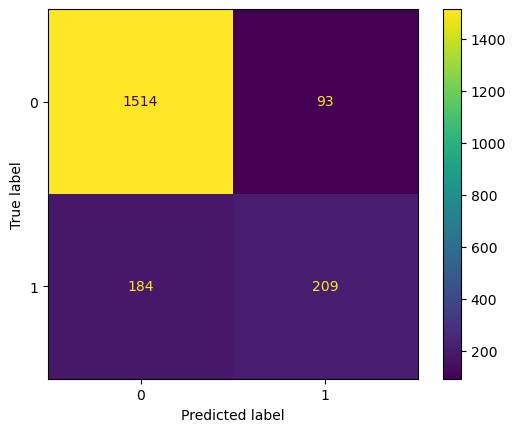

In [23]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(cm)

# classification report
report = classification_report(y_test, y_pred)
print(report)

# Calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)